# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?id=524901&appid={weather_api_key}"
print(url)

http://api.openweathermap.org/data/2.5/weather?id=524901&appid=d1714a6c263cd09c11eb0a715428de59


In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?id=524901&units=imperial&appid={weather_api_key}"
    #f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        time.sleep(1.5)
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | ordos
City not found. Skipping...
Processing Record 3 of Set 1 | piacabucu
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | itoman
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | vadso
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | tolanaro
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | afaahiti
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | kaga bandoro
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | blackmans bay
Proc

City not found. Skipping...
Processing Record 36 of Set 4 | ketchikan
Processing Record 37 of Set 4 | rye
Processing Record 38 of Set 4 | palmerston north
Processing Record 39 of Set 4 | sol'tsy
Processing Record 40 of Set 4 | wellington
Processing Record 41 of Set 4 | aras-asan
Processing Record 42 of Set 4 | corner brook
Processing Record 43 of Set 4 | dukhovnitskoye
Processing Record 44 of Set 4 | morristown
Processing Record 45 of Set 4 | dunedin
Processing Record 46 of Set 4 | ankazoabo
Processing Record 47 of Set 4 | bilao
Processing Record 48 of Set 4 | city of balikpapan
Processing Record 49 of Set 4 | christchurch
Processing Record 0 of Set 5 | la passe
Processing Record 1 of Set 5 | qamdo
Processing Record 2 of Set 5 | port augusta
Processing Record 3 of Set 5 | gewane
Processing Record 4 of Set 5 | stokesdale
Processing Record 5 of Set 5 | bechem
Processing Record 6 of Set 5 | shalkar
Processing Record 7 of Set 5 | huanggang
Processing Record 8 of Set 5 | mirny
Processing Re

Processing Record 29 of Set 8 | aasiaat
Processing Record 30 of Set 8 | dundaga
Processing Record 31 of Set 8 | kuanda
Processing Record 32 of Set 8 | saint-philippe
Processing Record 33 of Set 8 | rongelap
Processing Record 34 of Set 8 | santa ana
Processing Record 35 of Set 8 | uaua
Processing Record 36 of Set 8 | dhidhdhoo
Processing Record 37 of Set 8 | malango
Processing Record 38 of Set 8 | launceston
Processing Record 39 of Set 8 | udon thani
Processing Record 40 of Set 8 | anyama
Processing Record 41 of Set 8 | katsuren-haebaru
Processing Record 42 of Set 8 | bengkulu
Processing Record 43 of Set 8 | naze
Processing Record 44 of Set 8 | agat village
Processing Record 45 of Set 8 | rosarito
Processing Record 46 of Set 8 | bairnsdale
Processing Record 47 of Set 8 | lihue
Processing Record 48 of Set 8 | narasannapeta
Processing Record 49 of Set 8 | taurage
Processing Record 0 of Set 9 | chishtian
Processing Record 1 of Set 9 | djibo
Processing Record 2 of Set 9 | robbah
Processing 

Processing Record 18 of Set 12 | suva
Processing Record 19 of Set 12 | severnoye
Processing Record 20 of Set 12 | genhe
Processing Record 21 of Set 12 | susuman
Processing Record 22 of Set 12 | warmbaths
Processing Record 23 of Set 12 | smithers
Processing Record 24 of Set 12 | narrabri
Processing Record 25 of Set 12 | belyayevka
Processing Record 26 of Set 12 | harstad
Processing Record 27 of Set 12 | sarkand
Processing Record 28 of Set 12 | al khums
Processing Record 29 of Set 12 | withernsea
Processing Record 30 of Set 12 | callao
Processing Record 31 of Set 12 | swakopmund
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,53.28,71,100,8.75,NZ,1715240843
1,piacabucu,-10.4056,-36.4344,77.34,92,57,8.95,BR,1715240846
2,longyearbyen,78.2186,15.6401,33.64,69,40,21.85,SJ,1715240848
3,olonkinbyen,70.9221,-8.7187,26.51,89,100,32.79,SJ,1715240849
4,itoman,26.1247,127.6694,77.77,54,75,18.41,JP,1715240851


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,53.28,71,100,8.75,NZ,1715240843
1,piacabucu,-10.4056,-36.4344,77.34,92,57,8.95,BR,1715240846
2,longyearbyen,78.2186,15.6401,33.64,69,40,21.85,SJ,1715240848
3,olonkinbyen,70.9221,-8.7187,26.51,89,100,32.79,SJ,1715240849
4,itoman,26.1247,127.6694,77.77,54,75,18.41,JP,1715240851


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

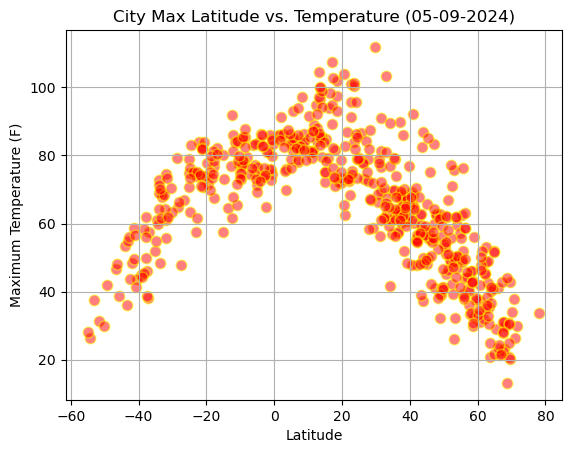

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color = "red",
    edgecolor = "yellow",
    marker = "o",
    s = 60,
    alpha = 0.5,
)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

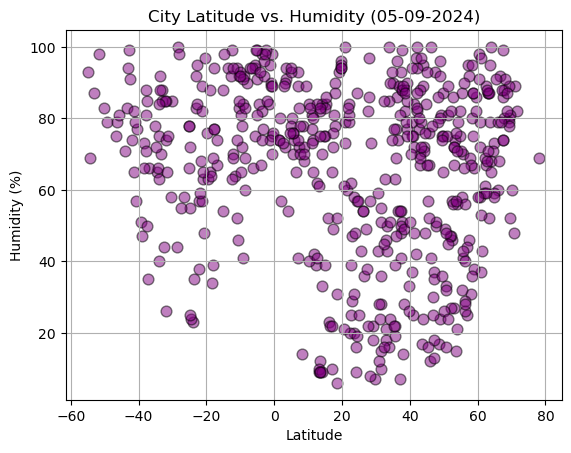

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color = "purple",
    edgecolor = "black",
    marker = "o",
    s = 60,
    alpha = 0.5,
)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

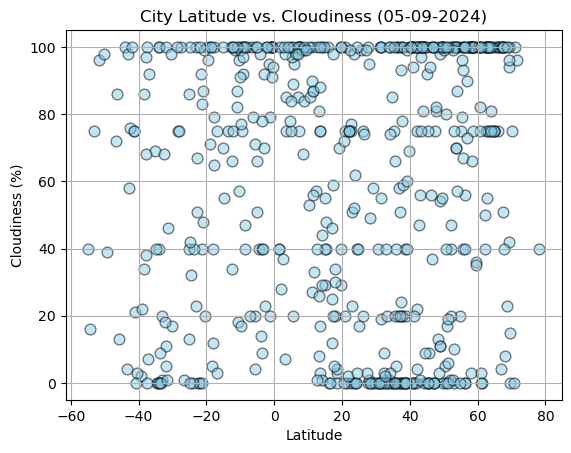

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color = "skyblue",
    edgecolor = "black",
    marker = "o",
    s = 60,
    alpha = 0.5,
)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

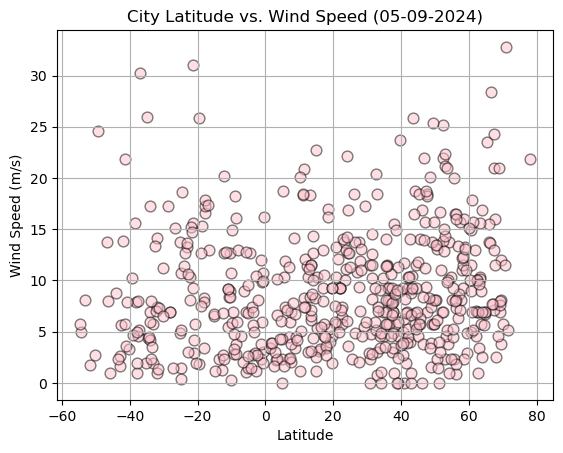

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color = "pink",
    edgecolor = "black",
    marker = "o",
    s = 60,
    alpha = 0.5,
)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regressValues = x_values * slope + intercept
    lineEQ = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(
        x_values,
        y_values,
        color = color,
        edgecolor = "black",
        marker = "o",
        s = 60,
        alpha = 0.5,
    )

    plt.plot(x_values, regressValues, "y-")
    
    # Help from Xpert Assistant was used for xycoords = 'axes fraction'
    plt.annotate(lineEQ, text_coordinates, color = "black", xycoords = 'axes fraction')
    
    # Incorporate the other graph properties
    plt.grid(True)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,longyearbyen,78.2186,15.6401,33.64,69,40,21.85,SJ,1715240848
3,olonkinbyen,70.9221,-8.7187,26.51,89,100,32.79,SJ,1715240849
4,itoman,26.1247,127.6694,77.77,54,75,18.41,JP,1715240851
5,vadso,70.0744,29.7487,33.96,60,75,5.75,NO,1715240854
14,georgetown,5.4112,100.3354,93.13,70,20,10.36,MY,1715240869


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude <= 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] < 0,:])

# Display sample data
southern_hemi_df.head(6)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,53.28,71,100,8.75,NZ,1715240843
1,piacabucu,-10.4056,-36.4344,77.34,92,57,8.95,BR,1715240846
6,port-aux-francais,-49.3500,70.2167,41.86,79,39,24.54,TF,1715240856
7,bredasdorp,-34.5322,20.0403,60.89,65,0,4.34,ZA,1715240857
8,tolanaro,-25.0319,46.9987,78.87,78,40,13.80,MG,1715240859
9,hithadhoo,-0.6000,73.0833,84.97,75,100,10.71,MV,1715240861


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.725028757266106


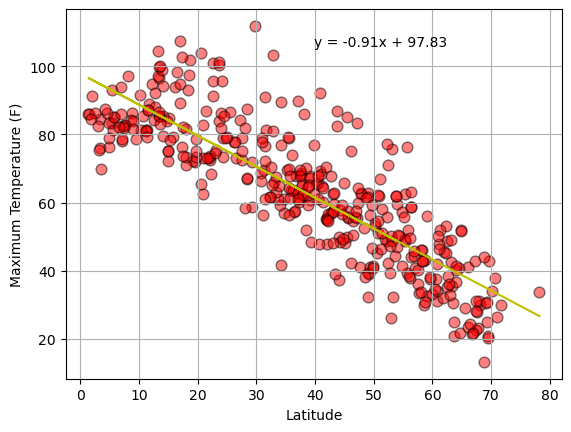

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Maximum Temperature (F)", (0.5,0.9), "red")

The r-value is: 0.660319471387835


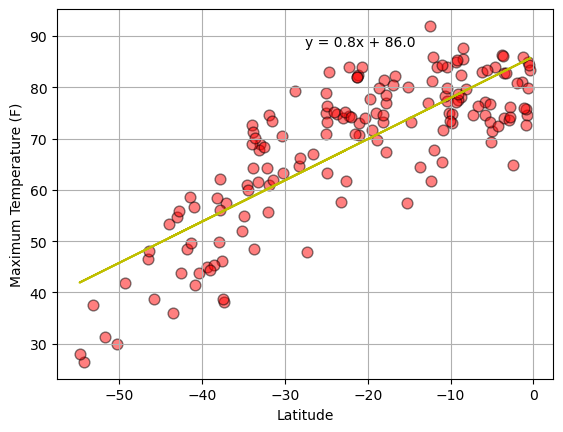

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Maximum Temperature (F)", (0.5,0.9), "red")

**Discussion about the linear relationship:** The linear relationship between latitude and maximum temperature indicates that there is a strong correlation between the values. Both the northern and southern hemispheres show that the closer the latitude is to 0, the higher the maximum temperature is. Latitudes further from 0 correlate with lower maximum temperatures. Conclusively, latitudes close to 0 tend to get higher maximum temperatures and the values get progressively lower the further away from latitude 0.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007939550152938967


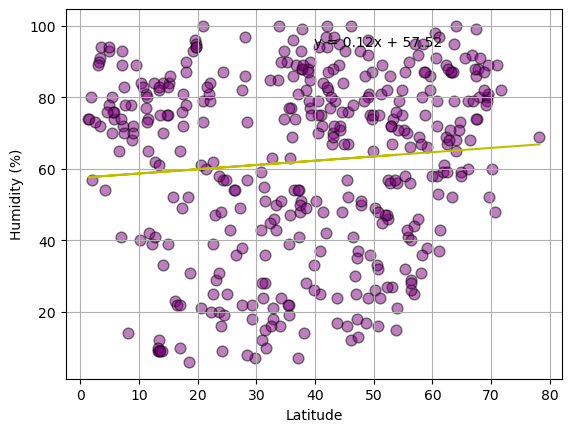

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity (%)", (0.5,0.9), "purple")

The r-value is: 0.03659800277607558


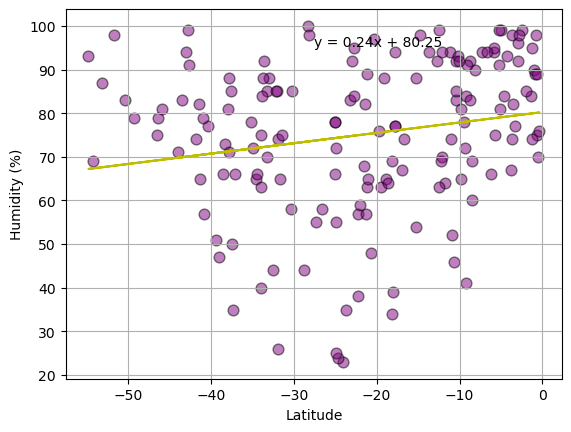

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity (%)", (0.5,0.9), "purple")

**Discussion about the linear relationship:** The low r-value indicates that there is little correlation between latitude and humidity in both the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.010322470829667123


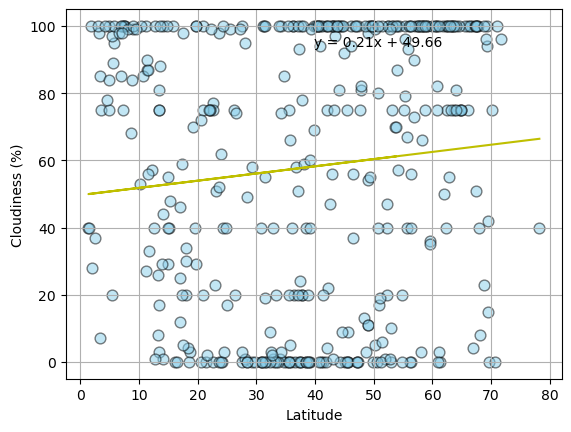

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness (%)", (0.5,0.9), "skyblue")

The r-value is: 0.07038186270509576


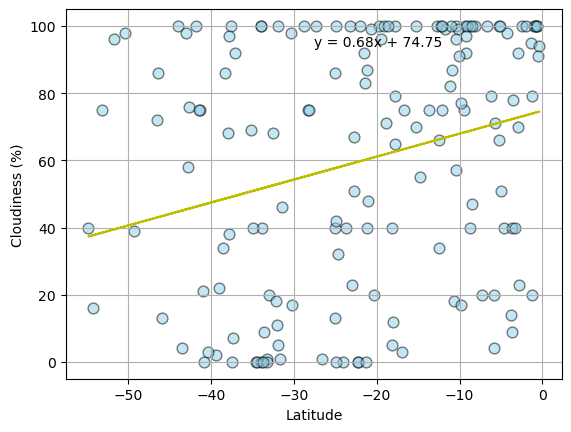

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness (%)", (0.5,0.9), "skyblue")

**Discussion about the linear relationship:** The low r-value for both hemispheres indicates that there is very little correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.039847798789714076


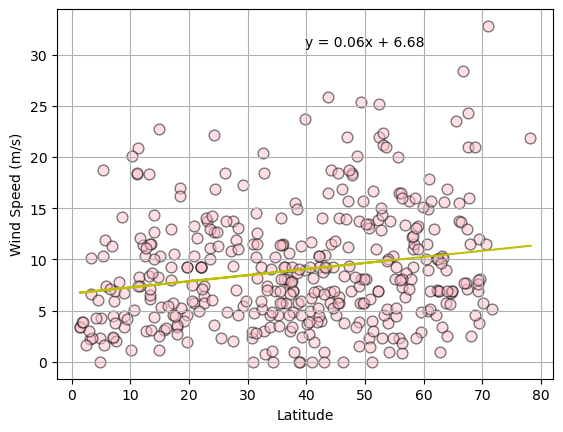

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed (m/s)", (0.5,0.9), "pink")

The r-value is: 0.0013776807477060208


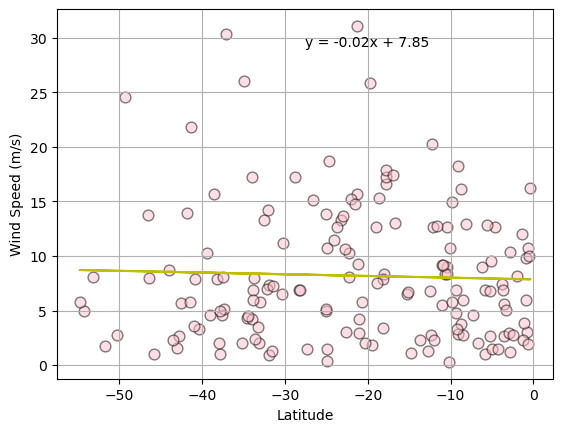

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed (m/s)", (0.5,0.9), "pink")

**Discussion about the linear relationship:** The r-value for wind speeds in the northern and southern hemispheres indicates that there is very little correlation between latitude and wind speed.